# Trained Model Visualization

Run this notebook to visualize models trained by [Training.ipynb](Training.ipynb)

Please first select the **language** for which you want to visualize the trained library embeddings. More configuration options are available in the config section below.

In [1]:
language = 'javascript'

In [2]:
import gc
import gzip
import collections
import math
import os
import urllib.request
import zipfile
from pathlib import Path
import json
import scipy
import re
import sys

import numpy as np
from sklearn.manifold import TSNE as tsne

from tqdm import tqdm_notebook as tqdm

from matplotlib import pyplot as plt

## CONFIGURATION

In [3]:
rootDir = '../datasets/' + language + '/models/'
dim = 100

## LOAD DATA

Update parameter language to visualize a different model. Leave the rest untouched.

In [4]:
filename = rootDir + 'vectorsHD_dim{}.json.gz'.format(dim)
with gzip.open(filename, 'r') as f:
    d = json.loads(f.read())

In [5]:
x = [item[1] for item in d.items()]
y = [item[0] for item in d.items()]

## Export to JSON file

In [6]:
def to_json(vectors, labels, data_dict, output_file):
    dat = {}
    max_x = np.amax(vectors, axis=0)[0].astype("float")
    max_y = np.amax(vectors, axis=0)[1].astype("float")
    dat["dimensions"] = {
        "x": [-max_x, max_x],
        "y": [-max_y, max_y]
    }
    if vectors.shape[1] > 2:
        max_z = np.amax(vectors, axis=0)[2].astype("float")
        dat["dimensions"]["z"] = [-max_z, max_z]
    dat["labels"] = labels
    dat["data"] = vectors.astype("float").tolist()
    with open(output_file, 'w') as f:
        json.dump(dat, f, indent=2)

## Visualize using t-SNE

In [7]:
perplexity = 10

In [8]:
model = tsne(n_components=2, random_state=42, perplexity=perplexity, n_iter=3000, verbose=3)
tvis_data = model.fit_transform(x)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 9303 samples in 0.020s...
[t-SNE] Computed neighbors for 9303 samples in 11.226s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9303
[t-SNE] Computed conditional probabilities for sample 2000 / 9303
[t-SNE] Computed conditional probabilities for sample 3000 / 9303
[t-SNE] Computed conditional probabilities for sample 4000 / 9303
[t-SNE] Computed conditional probabilities for sample 5000 / 9303
[t-SNE] Computed conditional probabilities for sample 6000 / 9303
[t-SNE] Computed conditional probabilities for sample 7000 / 9303
[t-SNE] Computed conditional probabilities for sample 8000 / 9303
[t-SNE] Computed conditional probabilities for sample 9000 / 9303
[t-SNE] Computed conditional probabilities for sample 9303 / 9303
[t-SNE] Mean sigma: 0.143119
[t-SNE] Computed conditional probabilities in 0.114s
[t-SNE] Iteration 50: error = 107.7475052, gradient norm = 0.0222344 (50 iterations in 4.231s)
[t-SNE] Iteration 100

In [9]:
filename = rootDir + "tsne-lib-p{}-neg{}-dim{}.json".format(perplexity, 1, dim)
to_json(tvis_data, list(y), None, filename)
filename

'../datasets/javascript/models/tsne-lib-p10-neg1-dim100.json'

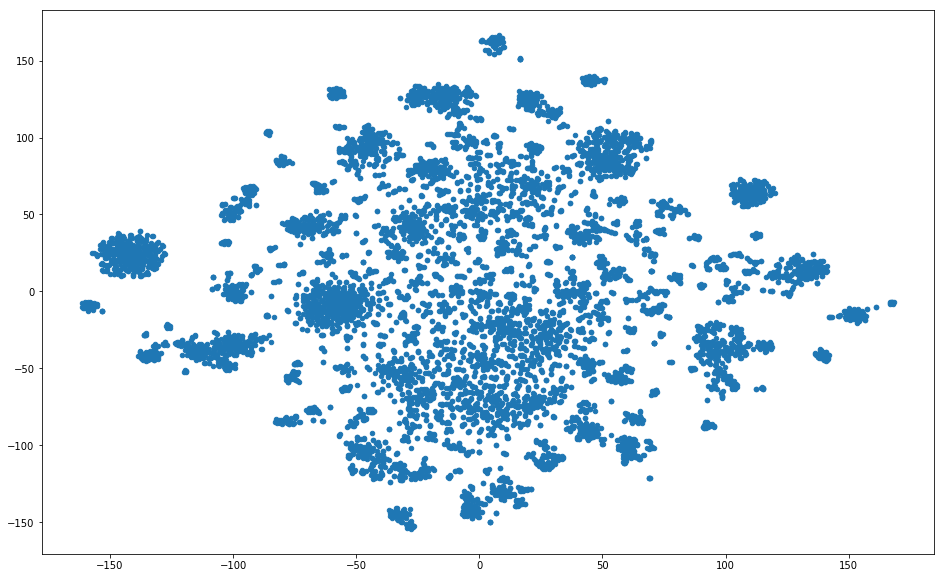

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16,10))
plt.scatter(tvis_data[:, 0], tvis_data[:, 1], 20)


In [11]:
with open(rootDir + 'vectors2D_dim{}.json'.format(dim), 'w') as f:
    vec2d = {y[i]: tvis_data[i].tolist() for i,_ in enumerate(y)}
    json.dump(vec2d, f)

In [12]:
perplexity = 10
model_3d = tsne(n_components=3, random_state=42, perplexity=perplexity, n_iter=3000, verbose=3)
tvis_data_3d = model_3d.fit_transform(x)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 9303 samples in 0.022s...
[t-SNE] Computed neighbors for 9303 samples in 11.522s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9303
[t-SNE] Computed conditional probabilities for sample 2000 / 9303
[t-SNE] Computed conditional probabilities for sample 3000 / 9303
[t-SNE] Computed conditional probabilities for sample 4000 / 9303
[t-SNE] Computed conditional probabilities for sample 5000 / 9303
[t-SNE] Computed conditional probabilities for sample 6000 / 9303
[t-SNE] Computed conditional probabilities for sample 7000 / 9303
[t-SNE] Computed conditional probabilities for sample 8000 / 9303
[t-SNE] Computed conditional probabilities for sample 9000 / 9303
[t-SNE] Computed conditional probabilities for sample 9303 / 9303
[t-SNE] Mean sigma: 0.143119
[t-SNE] Computed conditional probabilities in 0.120s
[t-SNE] Iteration 50: error = 107.6567230, gradient norm = 0.0070863 (50 iterations in 35.621s)
[t-SNE] Iteration 10

In [13]:
filename = rootDir + '3d_' + "tsne-lib-p{}-neg{}-dim{}.json".format(perplexity, 1, dim)
to_json(tvis_data_3d, list(y), None, filename)
filename

'../datasets/javascript/models/3d_tsne-lib-p10-neg1-dim100.json'

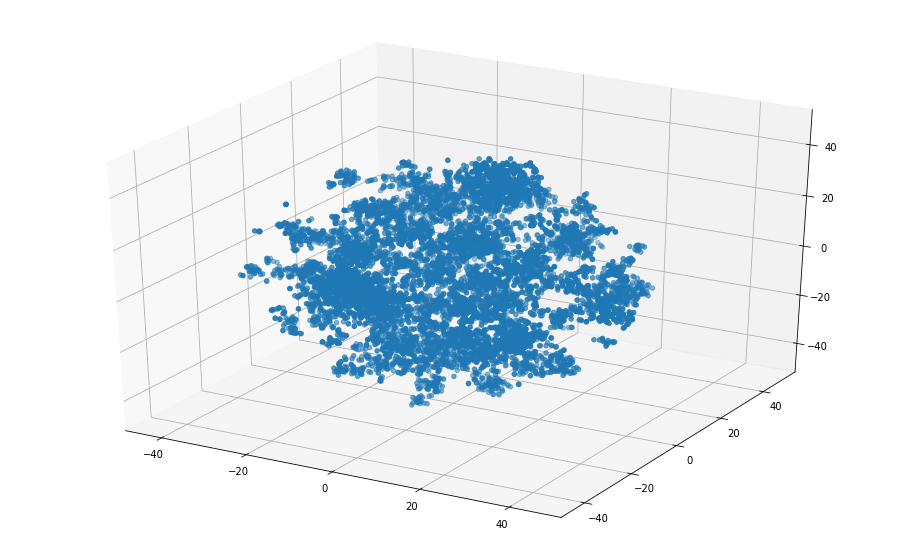

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tvis_data_3d[:,0], tvis_data_3d[:,1], tvis_data_3d[:,2])

In [15]:
with open(rootDir + 'vectors3D_dim{}.json'.format(dim), 'w') as f:
    vec3d = {y[i]: tvis_data_3d[i].tolist() for i,_ in enumerate(y)}
    json.dump(vec3d, f)